# Esperienza Microonde

### Utility per propagazione errore

L'angolo del goniometro era sfasato, tenerne conto nella relazione

In [970]:
import sympy
import numpy as np

def value_and_covariance_gen(expr, variables):
    expr = sympy.parse_expr(expr)

    symbols = sympy.symbols(variables)
    cov_symbols = sympy.symbols(tuple("C_" + k for k in variables))
    expr2 = sum(expr.diff(s) ** 2 * c for s, c in zip(symbols, cov_symbols))
    expr2 = expr2.simplify() # recommended for speed and accuracy

    fval = sympy.lambdify(symbols, expr)
    fcov = sympy.lambdify(symbols + cov_symbols, expr2)

    def fn(**kwargs):
        x = tuple(v[0] for v in kwargs.values())
        c = tuple(v[1] for v in kwargs.values())
        return fval(*x), fcov(*x, *c)

    return fn


def value_and_covariance(expr, **kwargs):
    return value_and_covariance_gen(expr, tuple(kwargs))(**kwargs)

## Caratterizzazione del fascio

### Legge di Malus / Polarizzazione

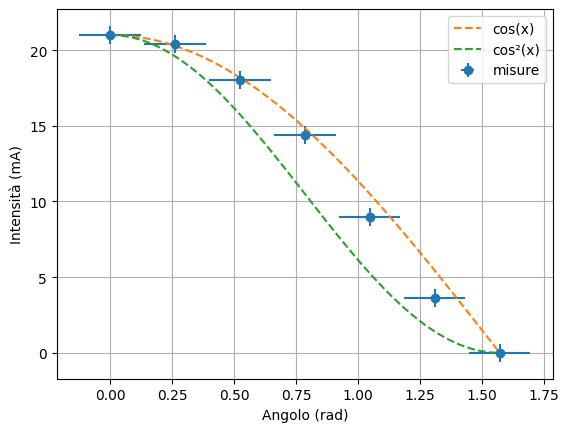

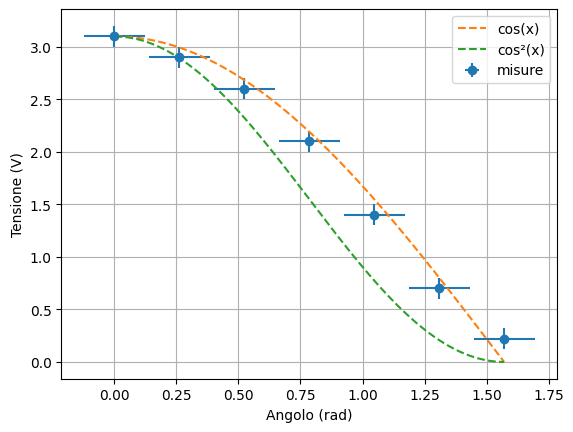

In [971]:
import numpy as np

theta = [0, 15, 30, 45, 60, 75, 90]
err_theta = 5 # gradi per un singoo ricervitore/trasmittore
err_totale = np.radians(np.sqrt(5**2+5**2))

# amperaggio mA x 30
M = [0.7, 0.68, 0.6, 0.48, 0.3, 0.12, 0] # * 30
err_M = .02 * 30
# voltmetro
V = [3.1, 2.9, 2.6, 2.1, 1.4, 0.7, 0.22]
err_V = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]

# plot data of cos(theta) with M and V
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,1)
ax.set_xlabel("Angolo (rad)")
ax.set_ylabel("Intensità (mA)")

theta_plt = np.linspace(0,90,1000)

#plt.plot(np.radians(theta), np.array(M)*30, 'o--')
plt.errorbar(np.radians(theta), np.array(M)*30, yerr=err_M, xerr=err_totale, fmt='o', label='misure')
# plot M[0]*30 * cos(theta)
plt.plot(np.radians(theta_plt), M[0]*30 * np.cos(np.radians(theta_plt)), '--', label='cos(x)')
plt.plot(np.radians(theta_plt), M[0]*30 * np.cos(np.radians(theta_plt))**2, '--', label='cos²(x)')

plt.grid()
plt.legend()
plt.show()


fig,ax = plt.subplots(1,1)
ax.set_xlabel("Angolo (rad)")
ax.set_ylabel("Tensione (V)")

# plot data of cos(theta) with V
#plt.plot(np.radians(theta), V, 'o--')
plt.errorbar(np.radians(theta), V, yerr=0.1, xerr=err_totale, fmt='o',label='misure')
# plot V[0] * cos(theta)
plt.plot(np.radians(theta_plt), V[0] * np.cos(np.radians(theta_plt)), '--', label='cos(x)')
plt.plot(np.radians(theta_plt), V[0] * np.cos(np.radians(theta_plt))**2, '--', label='cos²(x)')

plt.grid()
plt.legend()
plt.show()

In [972]:
import iminuit as m
from iminuit import Minuit
from iminuit.cost import LeastSquares
from scipy.stats import chi2

def model(x, a):
    return a * np.cos(x)

minimi_quadrati = LeastSquares(np.radians(theta), np.array(M)*30, err_M, model)

m = Minuit(minimi_quadrati, a=1)

m.migrad()
m.hesse()
display(m)

print(m.ndof)

def model(x, a):
    return a * np.cos(x)**2

minimi_quadrati = LeastSquares(np.radians(theta), np.array(M)*30, err_M, model)

m = Minuit(minimi_quadrati, a=1)

m.migrad()
m.hesse()
display(m)


def model(x, a):
    return a * np.cos(x)

minimi_quadrati = LeastSquares(np.radians(theta), V, err_V, model)

m = Minuit(minimi_quadrati, a=1)

m.migrad()
m.hesse()
display(m)

def model(x, a):
    return a * np.cos(x)**2

minimi_quadrati = LeastSquares(np.radians(theta), V, err_V, model)

m = Minuit(minimi_quadrati, a=1)

m.migrad()
m.hesse()
display(m)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 14.29 (χ²/ndof = 2.4)      │              Nfcn = 18               │
│ EDM = 8.19e-14 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   20.54   │   0.32    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────┐
│   │     a │
├───┼───────┤
│ a │ 0.103 │
└───┴───────┘

6.0


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 80.27 (χ²/ndof = 13.4)     │              Nfcn = 18               │
│ EDM = 1.47e-13 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   23.0    │    0.4    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────┐
│   │     a │
├───┼───────┤
│ a │ 0.131 │
└───┴───────┘

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 7.461 (χ²/ndof = 1.2)      │              Nfcn = 18               │
│ EDM = 6.68e-16 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   3.01    │   0.05    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────┐
│   │       a │
├───┼─────────┤
│ a │ 0.00286 │
└───┴─────────┘

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 89.26 (χ²/ndof = 14.9)     │              Nfcn = 18               │
│ EDM = 2.32e-15 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   3.35    │   0.06    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────┐
│   │       a │
├───┼─────────┤
│ a │ 0.00364 │
└───┴─────────┘

### Ampiezza

1. Studiare dipendenza ampiezza dall'angolo
2. Studiare dipendenza ampiezza dalla distanza

<ErrorbarContainer object of 3 artists>

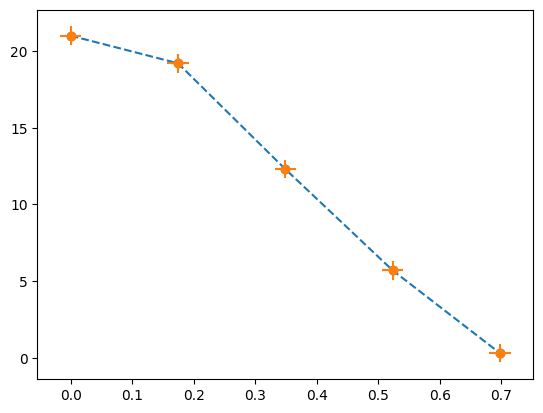

In [973]:
r_i = 101.7 # cm

# Punto 1
theta = [0, 10, 20, 30, 40]
M = [0.7, 0.64, 0.41, 0.19, 0.01] #x30

plt.plot(np.radians(theta), np.array(M)*30, 'o--')
plt.errorbar(np.radians(theta), np.array(M)*30, yerr=err_M, xerr=np.radians(1), fmt='o')

## Dipendenza dalla distanza

In [974]:
# confronto fit 1/r, 1/r^2
import iminuit as m
from iminuit import Minuit
from iminuit.cost import LeastSquares

# misura delle distanze fatte considerando ogni lunghezza d'onda per avere gli stessi massimi

lambda_ = 2.85 # cm

# misura amperometro
d_max = (81 - 12.5 - lambda_   * np.array([1, 2, 3, 4, 5, 6, 7, 8])) * 0.01
d_min = (81 - 12.5 - lambda_/2 * np.array([1, 3, 5, 7, 9, 11, 13, 15])) * 0.01
err_d = 0.005
M_max = np.array([0.56, 0.6, 0.64, 0.66, 0.7, 0.72, 0.76, 0.82]) * 30
M_min = np.array([0.56, 0.58, 0.6, 0.64, 0.68, 0.7, 0.72, 0.78]) * 30
err_M = 0.02 * 30
# trasform err_M in vector with 8 same vlaues
err_M = np.array([err_M] * 8)

V_max = np.array([2.4, 2.6, 2.8, 2.9, 3.1, 3.2, 3.3, 3.7])
V_min = np.array([2.4, 2.5, 2.6, 2.8, 3, 3.1, 3.2, 3.5])
err_V = 0.1

def model(x, a):
    return a/x

minimi_quadrati = LeastSquares(d_max, M_max, err_M, model)

m = Minuit(minimi_quadrati, a=1)

m.migrad()
m.hesse()
display(m)
#m.visualize()

a1 = m.values["a"]
err_a1 = m.errors["a"]
print(m.ndof)

minimi_quadrati = LeastSquares(d_min, M_min, err_M, model)

m = Minuit(minimi_quadrati, a=1)

m.migrad()
m.hesse()
display(m)
# m.visualize()


a2 = m.values["a"]
err_a2 = m.errors["a"]

minimi_quadrati = LeastSquares(d_min, V_min, err_V, model)

m = Minuit(minimi_quadrati, a=1)

m.migrad()
m.hesse()
display(m)

a3 = m.values["a"]
err_a3 = m.errors["a"]

minimi_quadrati = LeastSquares(d_max, V_max, err_V, model)

m = Minuit(minimi_quadrati, a=1)

m.migrad()
m.hesse()
display(m)

a4 = m.values["a"]
err_a4 = m.errors["a"]

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1.678 (χ²/ndof = 0.2)      │              Nfcn = 20               │
│ EDM = 2.68e-15 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   11.24   │   0.12    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬────────┐
│   │      a │
├───┼────────┤
│ a │ 0.0134 │
└───┴────────┘

7.0


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2.084 (χ²/ndof = 0.3)      │              Nfcn = 20               │
│ EDM = 7.41e-16 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   11.10   │   0.12    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬────────┐
│   │      a │
├───┼────────┤
│ a │ 0.0141 │
└───┴────────┘

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1.651 (χ²/ndof = 0.2)      │              Nfcn = 20               │
│ EDM = 2.17e-17 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   1.628   │   0.020   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬──────────┐
│   │        a │
├───┼──────────┤
│ a │ 0.000392 │
└───┴──────────┘

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 3.717 (χ²/ndof = 0.5)      │              Nfcn = 20               │
│ EDM = 3.57e-16 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   1.649   │   0.019   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬──────────┐
│   │        a │
├───┼──────────┤
│ a │ 0.000371 │
└───┴──────────┘

Mostriamo che il modello $\frac{a}{x^2}$ non può essere giusto oltre a mostrare come $\frac{a}{r}$ funzioni

In [975]:
def model(x, a):
    return a/(x**2)

minimi_quadrati = LeastSquares(d_max, M_max, err_M, model)

m = Minuit(minimi_quadrati, a=1)

m.migrad()
m.hesse()
display(m)
#m.visualize()

b1 = m.values["a"]

minimi_quadrati = LeastSquares(d_min, M_min, err_M, model)

m = Minuit(minimi_quadrati, a=1)

m.migrad()
m.hesse()
display(m)
# m.visualize()

b2 = m.values["a"]

minimi_quadrati = LeastSquares(d_min, V_min, err_V, model)

m = Minuit(minimi_quadrati, a=1)

m.migrad()
m.hesse()
display(m)

b3 = m.values["a"]

minimi_quadrati = LeastSquares(d_max, V_max, err_V, model)

m = Minuit(minimi_quadrati, a=1)

m.migrad()
m.hesse()
display(m)

b4 = m.values["a"]

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 136.9 (χ²/ndof = 19.6)     │              Nfcn = 18               │
│ EDM = 5.51e-16 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   5.91    │   0.06    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────┐
│   │       a │
├───┼─────────┤
│ a │ 0.00376 │
└───┴─────────┘

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 132.1 (χ²/ndof = 18.9)     │              Nfcn = 18               │
│ EDM = 5.57e-15 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   6.01    │   0.06    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────┐
│   │       a │
├───┼─────────┤
│ a │ 0.00419 │
└───┴─────────┘

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 80.14 (χ²/ndof = 11.4)     │              Nfcn = 18               │
│ EDM = 3.99e-17 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   0.882   │   0.011   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬──────────┐
│   │        a │
├───┼──────────┤
│ a │ 0.000116 │
└───┴──────────┘

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 89.72 (χ²/ndof = 12.8)     │              Nfcn = 16               │
│ EDM = 6.31e-17 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   0.869   │   0.010   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬──────────┐
│   │        a │
├───┼──────────┤
│ a │ 0.000104 │
└───┴──────────┘

### Grafici
Intensità massimi

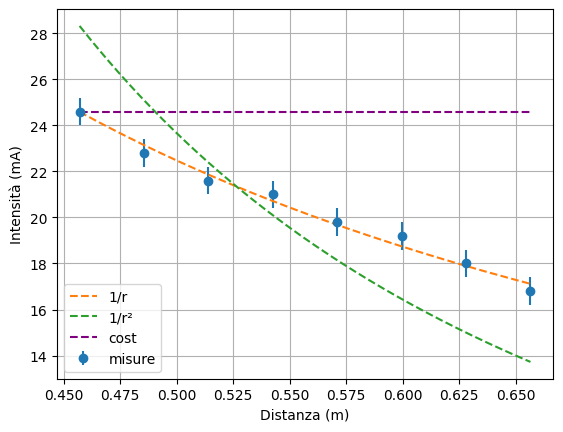

In [976]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel("Distanza (m)")
ax.set_ylabel("Intensità (mA)")

x = np.linspace(d_max.min(), d_max.max(), 1000)
y = a1 / x
z = b1 / (x**2)

ax.errorbar(d_max,M_max,err_M,fmt='o',label='misure')
ax.plot(x,y,linestyle='--',label='1/r')
ax.plot(x,z,linestyle='--',label='1/r²')
ax.hlines(M_max[-1],x.min(),x.max(),linestyle='--',label='cost',color='purple')

ax.grid()
ax.legend(loc="lower left")
plt.show()

Intensità minimi

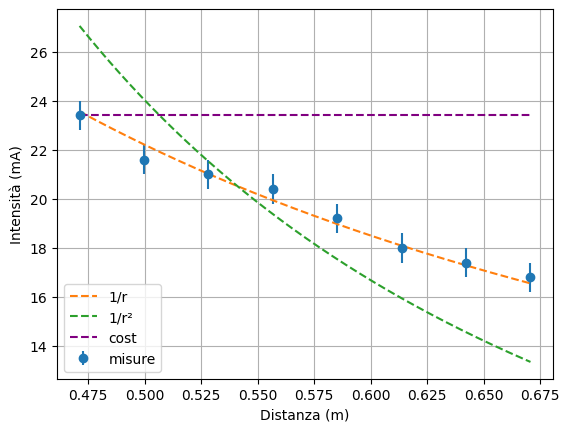

In [977]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel("Distanza (m)")
ax.set_ylabel("Intensità (mA)")

x = np.linspace(d_min.min(), d_min.max(), 1000)
y = a2 / x
z = b2 / (x**2)

ax.errorbar(d_min,M_min,err_M,fmt='o',label='misure')
ax.plot(x,y,linestyle='--',label='1/r')
ax.plot(x,z,linestyle='--',label='1/r²')
ax.hlines(M_min[-1],x.min(),x.max(),linestyle='--',label='cost',color='purple')

ax.grid()
ax.legend(loc="lower left")
plt.show()

Tensione massimi

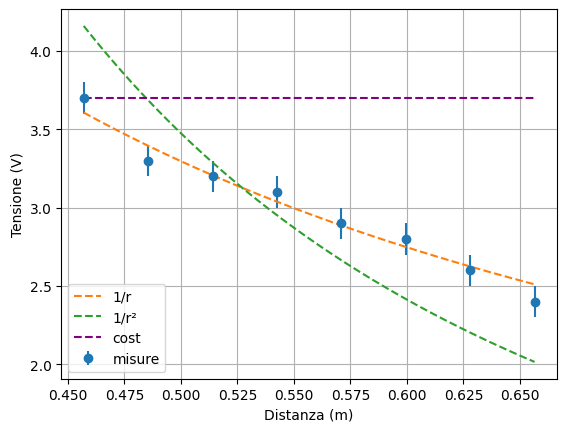

In [978]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel("Distanza (m)")
ax.set_ylabel("Tensione (V)")

x = np.linspace(d_max.min(), d_max.max(), 1000)
y = a4 / x
z = b4 / (x**2)

ax.errorbar(d_max,V_max,err_V,fmt='o',label='misure')
ax.plot(x,y,linestyle='--',label='1/r')
ax.plot(x,z,linestyle='--',label='1/r²')
ax.hlines(V_max[-1],x.min(),x.max(),linestyle='--',label='cost',color='purple')

ax.grid()
ax.legend(loc="lower left")
plt.show()

Tensione minimi

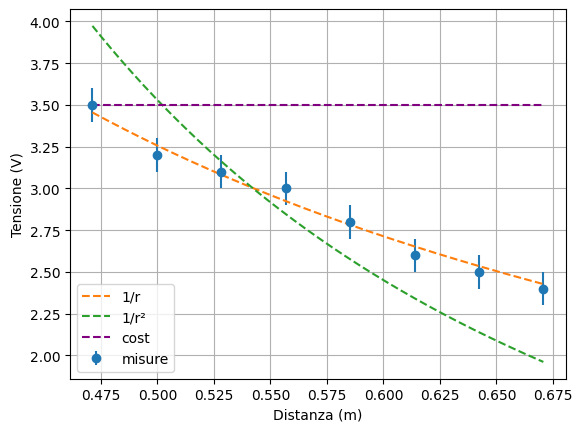

In [979]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel("Distanza (m)")
ax.set_ylabel("Tensione (V)")

x = np.linspace(d_min.min(), d_min.max(), 1000)
y = a3 / x
z = b3 / (x**2)

ax.errorbar(d_min,V_min,err_V,fmt='o',label='misure')
ax.plot(x,y,linestyle='--',label='1/r')
ax.plot(x,z,linestyle='--',label='1/r²')
ax.hlines(V_min[-1],x.min(),x.max(),linestyle='--',label='cost',color='purple')

ax.grid()
ax.legend(loc="lower left")
plt.show()

### Geometria

In [980]:
# parliamo pure della orientazione della polarizzazione
# verticale per avere valore minimo di amperaggio

## Angolo di Brewster

In [981]:
def model(x, a):
    return a*x**2

theta = np.radians([20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 47, 57, 23, \
                    27, 33, 37, 43, 53, 63])
M = np.array([0.50, 0.52, 0.56, 0.6, 0.66, 0.67, 0.7, 0.62, 0.48, 0.42, \
              0.680, 0.6, 0.52, 0.54, 0.6, 0.62, 0.68, 0.68, 0.44]) * 30
V = np.array([2.2, 2.3, 2.5, 2.7, 2.9, 3, 3.1, 2.7, 2.1, 1.9, 3.0, 2.6, \
              2.3, 2.4, 2.6, 2.8, 3, 3, 1.9])

sorted_indices = sorted(range(len(theta)), key=lambda i: theta[i])

theta = np.array(theta)[sorted_indices]
M = M[sorted_indices]
V = V[sorted_indices]

err_M = 0.02 * 30
err_M = np.array([err_M] * len(M))

def model(x, a, b, c):
    return c + b*x + a * x**2

minimi_quadrati = LeastSquares(theta[2:16], M[2:16], err_M[2:16], model)

m = Minuit(minimi_quadrati, a=1, b=1, c=1)

m.migrad()
m.hesse()
display(m)
plt.figure()

a1 = m.values["a"]
err_a1 = m.errors["a"]
b1 = m.values["b"]
err_b1 = m.errors["b"]
c1 = m.values["c"]

angolo_wurstel1 = value_and_covariance("- b / (2 * a)", b = (b1,err_b1), a = (a1,err_a1))
print(angolo_wurstel1, np.degrees(angolo_wurstel1))
print(m.ndof)

minimi_quadrati = LeastSquares(theta[2:16], V[2:16], 0.1, model)
m = Minuit(minimi_quadrati, a=1, b=1, c=1)
m.migrad()
m.hesse()
display(m)

a2 = m.values["a"]
err_a2 = m.errors["a"]
b2 = m.values["b"]
err_b2 = m.errors["b"]
c2 = m.values["c"]

angolo_wurstel2 = value_and_covariance("- b / (2 * a)", b = (b2,err_b2), a = (a2,err_a2))
print(angolo_wurstel2, np.degrees(angolo_wurstel2))
print(m.ndof)



┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 12.11 (χ²/ndof = 1.1)      │              Nfcn = 84               │
│ EDM = 1.94e-16 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │    -38    │     6     │            │            │         │         │       │
│ 1 │ b    │    61     │     8     │            │            │         │         │       │
│ 2 │ c    │   -4.5    │    2.9    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬────────────────┐
│   │    a    b    c │
├───┼────────────────┤
│ a │ 34.5  -49   17 │
│ b │  -49 71.8  -25 │
│ c │   17  -25 8.53 │
└───┴────────────────┘

(0.803075506740323, 0.004046190178969417) [46.01283717  0.23182962]
11.0


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 10.28 (χ²/ndof = 0.9)      │              Nfcn = 86               │
│ EDM = 2.75e-16 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   -6.1    │    1.0    │            │            │         │         │       │
│ 1 │ b    │    9.7    │    1.4    │            │            │         │         │       │
│ 2 │ c    │   -0.8    │    0.5    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────────┐
│   │     a     b     c │
├───┼───────────────────┤
│ a │ 0.965  -1.4  0.47 │
│ b │  -1.4  2.01 -0.69 │
│ c │  0.47 -0.69 0.239 │
└───┴───────────────────┘

(0.7900355058587822, 0.025848540282366734) [45.26570015  1.48101226]
11.0


<Figure size 640x480 with 0 Axes>

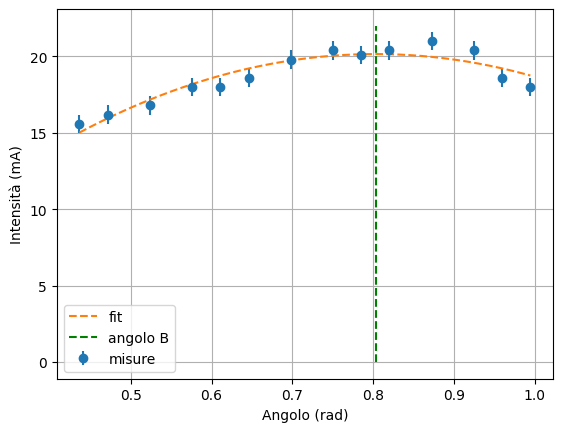

In [982]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel("Angolo (rad)")
ax.set_ylabel("Intensità (mA)")

theta = theta[2:16]
M = M[2:16]
err_M = err_M[2:16]

ax.errorbar(theta,M,err_M,fmt='o',label='misure')
x = np.linspace(theta.min(),theta.max(),1000)
y = a1 * x ** 2 + b1 * x + c1
ax.plot(x,y,linestyle='--',label='fit')
ax.vlines(angolo_wurstel1[0],0,22,linestyle='--',color='green',label='angolo B')

plt.grid()
plt.legend(loc='lower left')
plt.show()

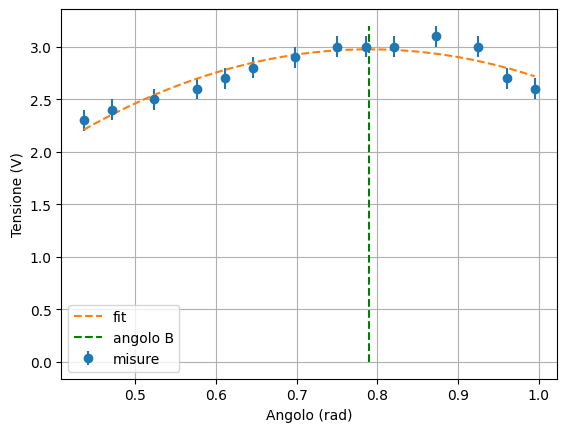

In [983]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel("Angolo (rad)")
ax.set_ylabel("Tensione (V)")

V = V[2:16]
err_V = [0.1] * len(V)

ax.errorbar(theta,V,err_V,fmt='o',label='misure')
x = np.linspace(theta.min(),theta.max(),1000)
y = a2 * x ** 2 + b2 * x + c2
ax.plot(x,y,linestyle='--',label='fit')
ax.vlines(angolo_wurstel2[0],0,3.2,linestyle='--',color='green',label='angolo B')

plt.grid()
plt.legend(loc='lower left')
plt.show()

## Interferenza

Studiare almeno due casi (per la valutazione ne vengono utilizzati due)

#### Fabry-Perot


Emettitore e ricevitore verticali

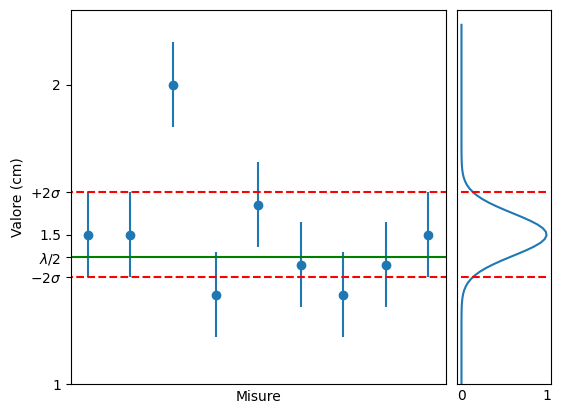

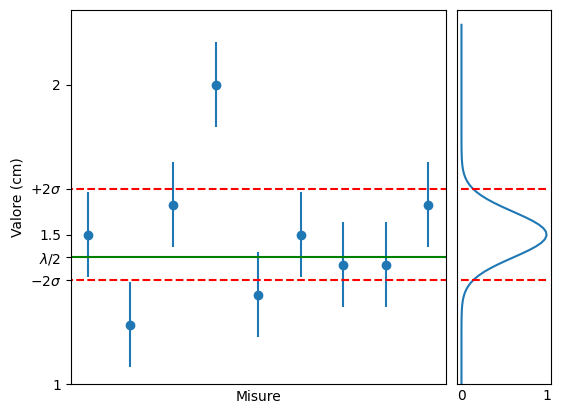

In [984]:
d_fissa = 80 #cm, non serve aumenta l'errore

#errore sistematico spessore lastre si cancella
d_min = np.array([24, 25.5, 27, 29, 30.3, 31.9, 33.3, 34.6, 36, 37.5]) #cm
d_max = np.array([23.5, 25, 26.2, 27.8, 29.8, 31.1, 32.6, 34, 35.4, 37]) #cm
err_d = 0.1 * np.sqrt(2) #cm

# create a vector difference of values between d_min[n+1] - d_min[n]
delta_d_min = np.diff(d_min)
# create a vector difference of values between d_max[n+1] - d_max[n]
delta_d_max = np.diff(d_max)

# rewrite all in a function
def plot_meas_with_gauss(delta_d, err_d, mean, std):
    fig = plt.figure(figsize=(6, 6))

    gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                        left=0.1, right=0.9, bottom=0.1, top=0.9,
                        wspace=0.05, hspace=0.05)
    
    ax = fig.add_subplot(gs[1, 0])
    ax_ploty = fig.add_subplot(gs[1, 1], sharey=ax)

    lower_bound = mean-2*std
    upper_bound = mean+2*std
 
    ax.set_xticks([])
    ax.set_xlabel("Misure")
    ax.set_ylabel("Valore (cm)")

    ax.errorbar(range(len(delta_d)), delta_d, yerr=err_d, fmt='o')
    ax.axhline(1.425,0,8, color='green')
    ax.set_yticks([1, lower_bound, 1.425, 1.5, upper_bound, 2])
    ax.set_yticklabels(["1", "$-2\\sigma$", "$\\lambda/2$", "1.5", "$+2\\sigma$", "2"])
    
    ax.axhline(lower_bound, -1, 10, color='r', linestyle="--")
    ax.axhline(upper_bound, -1, 10, color='r', linestyle="--")  
    ax.plot()

    x = np.linspace(1, 2.2, 100)
    ax_ploty.plot(np.exp(-0.5*((x-mean)/std)**2), x)
    ax_ploty.set_ylim(1, 2.25)
    ax_ploty.hlines([lower_bound, upper_bound], 0, 1, color='r', linestyles="dashed")
    ax_ploty.tick_params(labelleft=False, length=0)
    ax_ploty.plot()

mean_min = np.mean(delta_d_min)
std_min = np.std(delta_d_min, ddof=1)/np.sqrt(len(delta_d_min))
plot_meas_with_gauss(delta_d_min, err_d, mean_min, std_min)

mean_max = np.mean(delta_d_max)
std_max = np.std(delta_d_max, ddof=1)/np.sqrt(len(delta_d_max))
plot_meas_with_gauss(delta_d_max, err_d, mean_max, std_max)


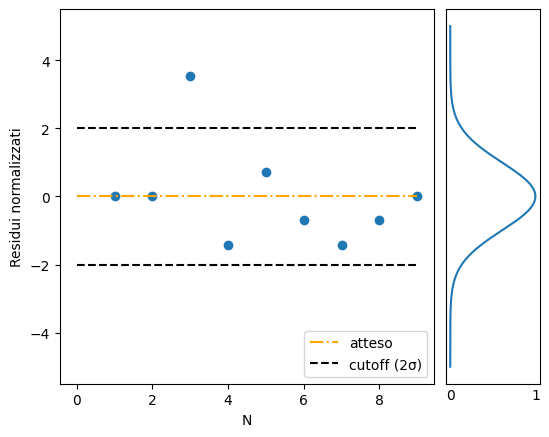

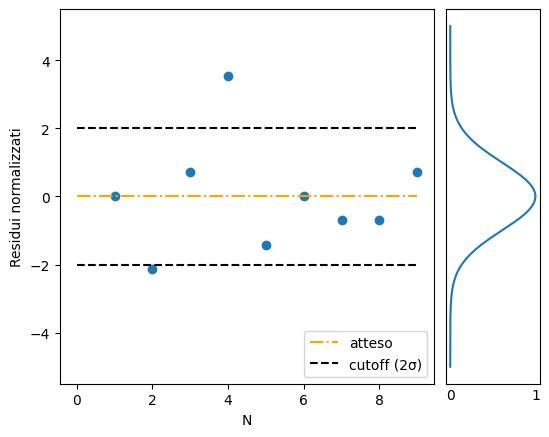

In [985]:
def mostra_residui(y, err_y, sigma):
    residuals = (y - np.mean(y))/err_y

    fig = plt.figure(figsize=(6, 6))

    gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                        left=0.1, right=0.9, bottom=0.1, top=0.9,
                        wspace=0.05, hspace=0.05)

    ax = fig.add_subplot(gs[1, 0])
    ax_ploty = fig.add_subplot(gs[1, 1], sharey=ax)

    # weigthed mean of residuals

    N = [1,2,3,4,5,6,7,8,9]
    ax.scatter(N, residuals)
    ax.hlines(0,0,9,color='orange',linestyle='-.',label='atteso')
    ax.hlines(sigma,0,9,color='black',linestyle='--',label='cutoff (' + str(sigma) + 'σ)')
    ax.hlines(-sigma,0,9,color='black',linestyle='--')
    ax.set_xlabel("N")
    ax.set_ylabel("Residui normalizzati")
    ax.legend(loc='lower right')
    ax.plot()

    x = np.linspace(-5, 5, 1000)
    ax_ploty.plot(np.exp(-0.5*(x)**2), x)
    ax_ploty.tick_params(labelleft=False, length=0)

mostra_residui(delta_d_min, err_d,2)
mostra_residui(delta_d_max, err_d,2)

In [986]:
delta_d_max_new = np.delete(delta_d_max, (1,3))
delta_d_max_mean = np.mean(delta_d_max_new)
err_delta_d_max_mean = np.std(delta_d_max_new,ddof=1)/np.sqrt(len(delta_d_max_new))
print(delta_d_max_mean*2,err_delta_d_max_mean*2)
t = (delta_d_max_mean*2 - 2.85)/(err_delta_d_max_mean*2)
print(t)

delta_d_min_new = np.delete(delta_d_min, 2)
delta_d_min_mean = np.mean(delta_d_min_new)
err_delta_d_min_mean = np.std(delta_d_min_new,ddof=1)/np.sqrt(len(delta_d_min_new))
print(delta_d_min_mean*2,err_delta_d_min_mean*2)
t = (delta_d_min_mean*2 - 2.85)/(err_delta_d_min_mean*2)
print(t)

2.942857142857143 0.0841120082507419
1.1039701082909756
2.875 0.07499999999999911
0.3333333333333361


#### Doppia fenditura

Emettitore e ricevitore verticali

In [987]:
theta_min = np.radians([8, 17, 27, 40])
theta_max = np.radians([0, 13, 22, 30, ])#45])
err_theta = np.radians(1)

M_max = np.array([0.18, 0.12, 0.12, 0.1,])*30 #0.2]) * 30
M_min = np.array([0.01, 0, 0, 0]) * 30
err_M = 0.02 * 30
V_max = np.array([.8, .6, .6, .4, .8])
err_V = 0.01

d = 17 # cm
err_d = 0.2

lambda_ = 2.85 # cm

n_max = value_and_covariance("a * sin(t) / 2.85", a=(d, err_d), t=(theta_max, err_theta))
n_min = value_and_covariance("(2 * a * sin(t) / 2.85 - 1) / 2", a =(d, err_d), t=(theta_min, err_theta))

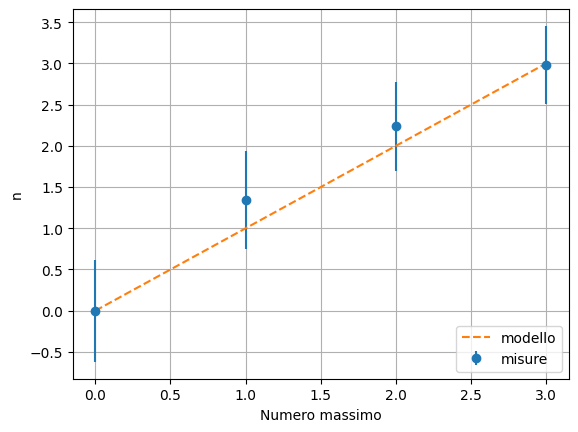

In [988]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('Numero massimo')
ax.set_ylabel('n')

N = [0,1,2,3]
ax.errorbar(N,n_max[0],n_max[1],fmt='o',label='misure')
x = np.linspace(0,3,10)
y = x
ax.plot(x,y,linestyle='--',label='modello')

plt.grid()
plt.legend(loc='lower right')
plt.show()

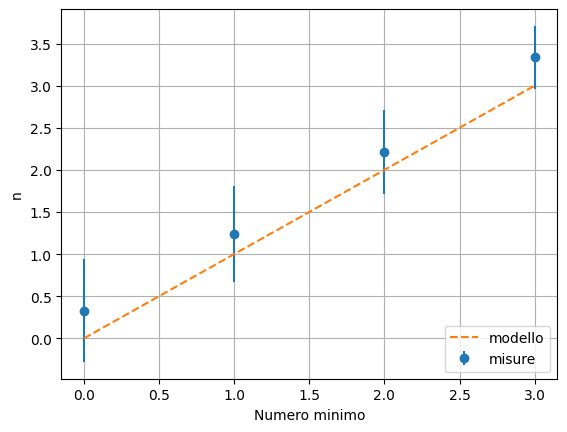

In [989]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('Numero minimo')
ax.set_ylabel('n')

N = [0,1,2,3]
ax.errorbar(N,n_min[0],n_min[1],fmt='o',label='misure')
x = np.linspace(0,3,10)
y = x
ax.plot(x,y,linestyle='--',label='modello')

plt.grid()
plt.legend(loc='lower right')
plt.show()

In [990]:
def model(x,a):
    return a*x

minimi_quadrati = LeastSquares(N,n_max[0],n_max[1],model)
m = Minuit(minimi_quadrati,a=1)
m.migrad()
m.hesse()
display(m)
print(m.ndof)

minimi_quadrati = LeastSquares(N,n_min[0],n_min[1],model)
m = Minuit(minimi_quadrati,a=1)
m.migrad()
m.hesse()
display(m)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 0.4285 (χ²/ndof = 0.1)     │              Nfcn = 16               │
│ EDM = 4.28e-23 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   1.04    │   0.13    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬────────┐
│   │      a │
├───┼────────┤
│ a │ 0.0175 │
└───┴────────┘

3.0


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 0.3475 (χ²/ndof = 0.1)     │              Nfcn = 16               │
│ EDM = 3.98e-21 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   1.11    │   0.11    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────┐
│   │     a │
├───┼───────┤
│ a │ 0.012 │
└───┴───────┘

## Diffrazione di Bragg

$\theta = 0$ è massimo banale per n = 0

### Unione di tutte le misure
Ogni singola misura è poi separata sotto

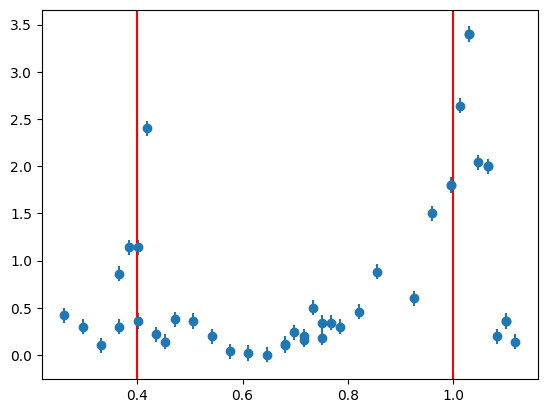

In [991]:
theta = np.array(np.radians([39, 40, 41, 42, 43, 44, 21, 22, 23, 24, 26, 15,17,19,21,23,25,27,29, \
                             31,33,35,37,39,41,43,45,47,49,53,55,57,59,61,63, 57, 58, 59, 60, 61, 62, 63, 64]))

M = np.array([0.12, 0.24, 0.16, 0.5, 0.34, 0.34, 0.3, 0.38*3, 0.38*3, 0.8*3, 0.14, 0.42, 0.3, 0.1, 0.86, 0.36, 0.22, 0.38, 0.36, 0.2, \
            0.04, 0.02, 0, 0.1, 0.2, 0.18, 0.3, 0.46, 0.88, 0.60, 1.5, 1.8, 3.4, 2.0, 0.36, \
            1.8, 2.64, 3.4, 2.04, 2.0,  0.2, 0.36, 0.14])

err_M = np.array( [0.08] * len(M) )

plt.errorbar(theta, M, err_M, fmt='o')
plt.axvline(0.4,0,1,color='r')
plt.axvline(1,0,1,color='r')
plt.show()

Godo, ho trovato come mettere i theta in ordine, ma rimanendo nella stessa posizione con M :)

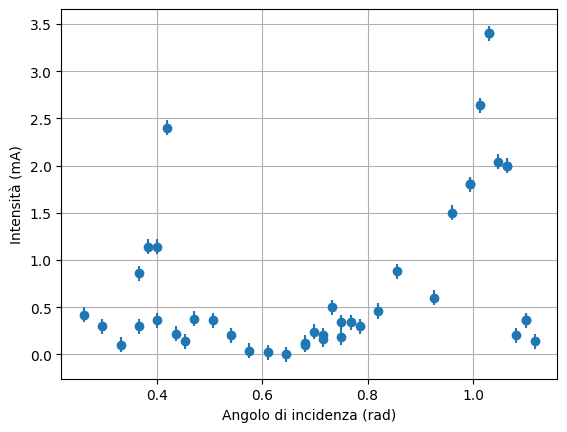

In [992]:
theta_sorted, M_sorted = zip(*sorted(zip(theta, M)))

fig,ax = plt.subplots(1,1)
ax.set_xlabel("Angolo di incidenza (rad)")
ax.set_ylabel("Intensità (mA)")
plt.errorbar(theta_sorted, M_sorted, err_M, fmt='o')
plt.grid()
plt.show()

### Ricerca dei massimi

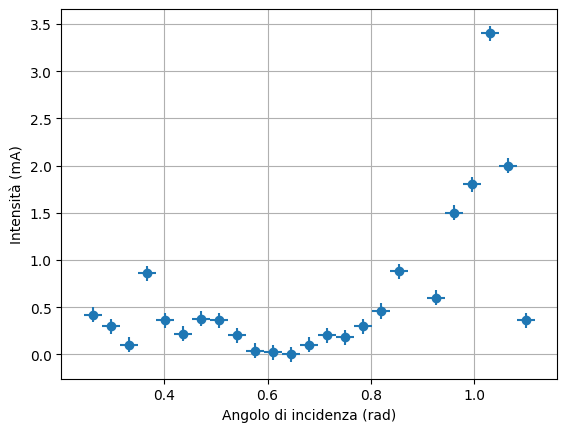

In [993]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel("Angolo di incidenza (rad)")
ax.set_ylabel("Intensità (mA)")

theta_scan = np.array(np.radians([15,17,19,21,23,25,27,29,31,33,35,37,39,41,43,45,47,49,53,55,57,59,61,63]))
M_scan = np.array([0.42, 0.3, 0.1, 0.86, 0.36, 0.22, 0.38, 0.36, 0.2, \
            0.04, 0.02, 0, 0.1, 0.2, 0.18, 0.3, 0.46, 0.88, 0.60, 1.5, 1.8, 3.4, 2.0, 0.36])
err_theta = np.radians(1)
err_M_scan = np.array([0.08] * len(M_scan))

plt.errorbar(theta_scan, M_scan, err_M_scan, err_theta,fmt='o')
plt.grid()
plt.show()

### Primo tentativo: circa 40°, n stimato = 2
Dopo lo scan non possiamo più pensare sia un massimo, ma non buttiamo i dati

In [994]:
thetas = np.radians([39, 40, 41, 42, 43, 44])
M = [0.12, 0.24, 0.16, 0.5, 0.34, 0.34 ] #x1 mA
err_M = np.array([0.08] * len(M))


def model(x, a, b, c):
    return c + b*x + a  *x**2

minimi_quadrati = LeastSquares(thetas, M, err_M, model)
m = Minuit(minimi_quadrati, a=1, b=1, c=1)

m.migrad()
m.hesse()
display(m)
plt.show()

theta_max = value_and_covariance("-b/ (2*a)", b=(m.values["b"], m.errors["b"]), a =(m.values["a"], m.errors["a"]))
print(theta_max)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 6.845 (χ²/ndof = 2.3)      │              Nfcn = 78               │
│ EDM = 3.51e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │    -50    │    40     │            │            │         │         │       │
│ 1 │ b    │    80     │    50     │            │            │         │         │       │
│ 2 │ c    │    -30    │    19     │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬────────────────────────────┐
│   │        a        b        c │
├───┼────────────────────────────┤
│ a │ 1.37e+03   -2.0e3    0.7e3 │
│ b │   -2.0e3 2.88e+03   -1.0e3 │
│ c │    0.7e3   -1.0e3      377 │
└───┴────────────────────────────┘

(0.7506739064272445, 0.01174839239955164)


### Secondo tentativo: circa 20°, n stimato = 1


In [995]:
thetas2 = np.radians([21, 22, 23, 24, 26])
M2 = [0.3, 0.38*3, 0.38*3, 0.8*3, 0.14] #ma con fattore specificato
err_M2 = np.array([0.08, 0.08*3, 0.08*3, 0.08*3, 0.08])


def model(x, a, b, c):
    return c + b*x + a  *x**2

minimi_quadrati = LeastSquares(thetas2, M2, err_M2, model)
m = Minuit(minimi_quadrati, a=1, b=1, c=1)

m.migrad()
m.hesse()
display(m)
plt.show()

theta_max2 = value_and_covariance("-b/ (2*a)", b=(m.values["b"], m.errors["b"]), a =(m.values["a"], m.errors["a"]))
print(np.degrees(theta_max2))

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 14.75 (χ²/ndof = 7.4)      │              Nfcn = 92               │
│ EDM = 1.41e-13 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   -830    │    90     │            │            │         │         │       │
│ 1 │ b    │    680    │    70     │            │            │         │         │       │
│ 2 │ c    │   -137    │    15     │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬────────────────────────────┐
│   │        a        b        c │
├───┼────────────────────────────┤
│ a │ 8.08e+03     -7e3   1.35e3 │
│ b │     -7e3 5.45e+03  -1.11e3 │
│ c │   1.35e3  -1.11e3      225 │
└───┴────────────────────────────┘

[2.34510569e+01 2.80822469e-03]


### Terzo tentativo: circa 60°, n stimato = 2

In [996]:
thetas3 = np.array(np.radians([53,55, 57, 58, 59, 60, 61, 62, 63, 64]))
M3 = np.array([0.6, 1.5, 1.8, 2.64, 3.4, 2.04, 2.0,  0.2, 0.36, 0.14])
err_M3 = np.array([0.24] * len(M3))


def model(x, a, b, c):
    return c + b*x + a  *x**2

minimi_quadrati = LeastSquares(thetas3, M3, err_M3, model)
m = Minuit(minimi_quadrati, a=1, b=1, c=1)

m.migrad()
m.hesse()
display(m)
plt.show()

theta_max3 = value_and_covariance("-b/ (2*a)", b=(m.values["b"], m.errors["b"]), a =(m.values["a"], m.errors["a"]))
print(np.degrees(theta_max3))

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 49.17 (χ²/ndof = 7.0)      │              Nfcn = 93               │
│ EDM = 8.17e-13 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   -256    │    20     │            │            │         │         │       │
│ 1 │ b    │    520    │    40     │            │            │         │         │       │
│ 2 │ c    │   -260    │    21     │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬────────────────────────────┐
│   │        a        b        c │
├───┼────────────────────────────┤
│ a │      408   -0.8e3    0.4e3 │
│ b │   -0.8e3 1.71e+03   -0.9e3 │
│ c │    0.4e3   -0.9e3      446 │
└───┴────────────────────────────┘

[5.80383258e+01 2.71923484e-02]


### Calcolo di d da slicing di tutti i dati presi 


n = 1

In [997]:
theta_1 = np.array(theta_sorted[1:13])
M_1 = np.array(M_sorted[1:13])

err_M = np.array([0.20] * len(M_1))

def model(x, a, b, c):
    return c + b*x + a  *x**2

minimi_quadrati = LeastSquares(theta_1, M_1, err_M, model)
m = Minuit(minimi_quadrati, a=1, b=1, c=1)

m.migrad()
m.hesse()
display(m)

a1 = m.values["a"]
b1 = m.values["b"]
c1 = m.values["c"]

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 99.49 (χ²/ndof = 11.1)     │              Nfcn = 83               │
│ EDM = 2.5e-16 (Goal: 0.0002)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │    -69    │    15     │            │            │         │         │       │
│ 1 │ b    │    56     │    12     │            │            │         │         │       │
│ 2 │ c    │   -10.4   │    2.4    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────────────────┐
│   │       a       b       c │
├───┼─────────────────────────┤
│ a │     228 -0.18e3      36 │
│ b │ -0.18e3     149     -29 │
│ c │      36     -29     5.9 │
└───┴─────────────────────────┘

[ 1.16098083 -2.00731319 -2.33398911  0.46601089  1.51827972 -2.51904692
  1.38095308  7.75403096 -2.86248663 -2.76859969 -0.86430822  1.07548829]


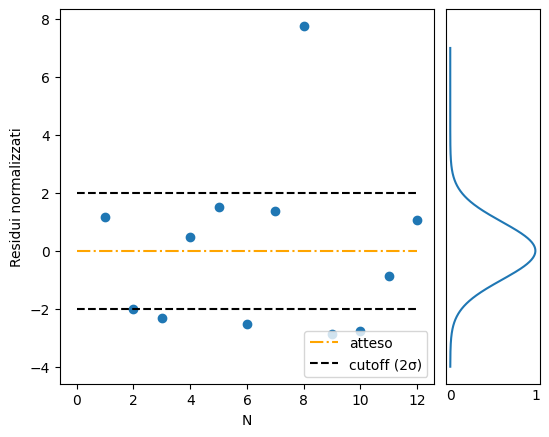

In [998]:
def mostra_residui(y, err_y, model, a, b, c, x):
    residuals = (y - model(x,a,b,c))/err_y

    fig = plt.figure(figsize=(6, 6))

    gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                        left=0.1, right=0.9, bottom=0.1, top=0.9,
                        wspace=0.05, hspace=0.05)

    ax = fig.add_subplot(gs[1, 0])
    ax_ploty = fig.add_subplot(gs[1, 1], sharey=ax)

    # weigthed mean of residuals

    N = [1,2,3,4,5,6,7,8,9,10,11,12]
    ax.scatter(N, residuals)
    ax.hlines(0,0,12,color='orange',linestyle='-.',label='atteso')
    ax.hlines(2,0,12,color='black',linestyle='--',label='cutoff (2σ)')
    ax.hlines(-2,0,12,color='black',linestyle='--')
    ax.set_xlabel("N")
    ax.set_ylabel("Residui normalizzati")
    ax.legend(loc='lower right')
    ax.plot()

    x = np.linspace(-4, 7, 1000)
    ax_ploty.plot(np.exp(-0.5*(x)**2), x)
    ax_ploty.tick_params(labelleft=False, length=0)

    print(residuals)

def model(x,a,b,c):
    return a*x**2 + b*x + c

mostra_residui(M_1, err_M, model, a1, b1, c1, theta_1)

In [999]:
theta_1_n = np.delete(theta_1, (1,2,5,7,8,9))
M_1_n = np.delete(M_1, (1,2,5,7,8,9))
err_M_n = np.array([0.20] * len(M_1_n))

def model(x, a, b, c):
    return c + b*x + a  *x**2

minimi_quadrati = LeastSquares(theta_1_n, M_1_n, err_M_n, model)
m = Minuit(minimi_quadrati, a=1, b=1, c=1)

m.migrad()
m.hesse()
display(m)

a1 = m.values["a"]
b1 = m.values["b"]
c1 = m.values["c"]
#theta_max1 = value_and_covariance("-b/ (2*a)", b=(m.values["b"], m.errors["b"]), a =(m.values["a"], m.errors["a"]))

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 3.38 (χ²/ndof = 1.1)       │              Nfcn = 91               │
│ EDM = 1.73e-16 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │    -69    │    17     │            │            │         │         │       │
│ 1 │ b    │    55     │    14     │            │            │         │         │       │
│ 2 │ c    │   -9.9    │    2.8    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────────────────┐
│   │       a       b       c │
├───┼─────────────────────────┤
│ a │     304 -0.25e3      48 │
│ b │ -0.25e3     201     -40 │
│ c │      48     -40    7.96 │
└───┴─────────────────────────┘

In [1000]:
from uncertainties import ufloat
from uncertainties.umath import *

b = ufloat(m.values["b"],m.errors["b"])
a = ufloat(m.values["a"],m.errors["a"])

theta_max1 = - b / (2*a)
print(theta_max1)

0.40+/-0.14


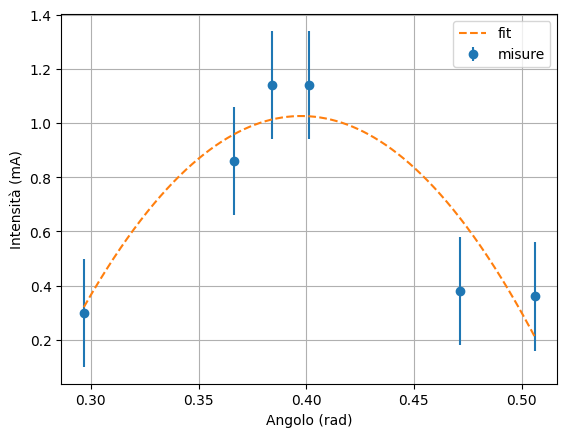

In [1001]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel("Angolo (rad)")
ax.set_ylabel("Intensità (mA)")

ax.errorbar(theta_1_n,M_1_n,err_M_n,fmt='o',label='misure')
x = np.linspace(theta_1_n.min(),theta_1_n.max(),1000)
y = model(x,a1,b1,c1)
ax.plot(x,y,linestyle='--',label='fit')

plt.grid()
plt.legend()
plt.show()

n = 2

In [1002]:
theta_2 = np.array(theta_sorted[29:42])
M_2 = np.array(M_sorted[29:42])

err_M = np.array([0.20] * len(M_2))

def model(x, a, b, c):
    return c + b*x + a  *x**2

minimi_quadrati = LeastSquares(theta_2, M_2, err_M, model)
m = Minuit(minimi_quadrati, a=1, b=1, c=1)

m.migrad()
m.hesse()
display(m)

a2 = m.values["a"]
b2 = m.values["b"]
c2 = m.values["c"]

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 94 (χ²/ndof = 9.4)         │              Nfcn = 93               │
│ EDM = 2.45e-11 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   -309    │    20     │            │            │         │         │       │
│ 1 │ b    │    630    │    40     │            │            │         │         │       │
│ 2 │ c    │   -315    │    21     │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬────────────────────────────┐
│   │        a        b        c │
├───┼────────────────────────────┤
│ a │      412   -0.8e3    0.4e3 │
│ b │   -0.8e3 1.71e+03   -0.9e3 │
│ c │    0.4e3   -0.9e3      444 │
└───┴────────────────────────────┘

[ 1.9032253  -1.19745011 -3.52935416 -3.52935416  0.16798307  4.40751314
  4.40751314 -1.01076394  1.11315181  1.11315181 -4.62073959  0.38756184
  0.38756184]


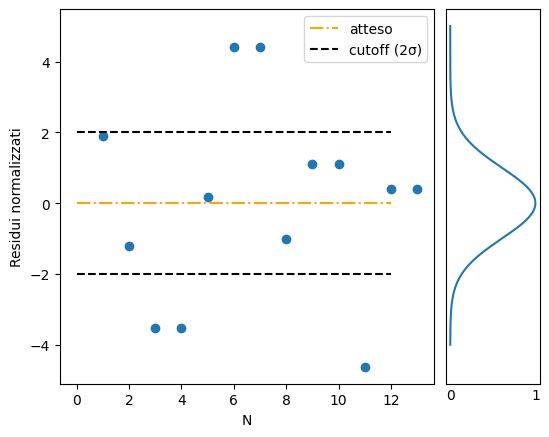

In [1003]:
def mostra_residui(y, err_y, model, a, b, c, x):
    residuals = (y - model(x,a,b,c))/err_y

    fig = plt.figure(figsize=(6, 6))

    gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                        left=0.1, right=0.9, bottom=0.1, top=0.9,
                        wspace=0.05, hspace=0.05)

    ax = fig.add_subplot(gs[1, 0])
    ax_ploty = fig.add_subplot(gs[1, 1], sharey=ax)

    # weigthed mean of residuals

    N = [1,2,3,4,5,6,7,8,9,10,11,12,13]
    ax.scatter(N, residuals)
    ax.hlines(0,0,12,color='orange',linestyle='-.',label='atteso')
    ax.hlines(2,0,12,color='black',linestyle='--',label='cutoff (2σ)')
    ax.hlines(-2,0,12,color='black',linestyle='--')
    ax.set_xlabel("N")
    ax.set_ylabel("Residui normalizzati")
    ax.legend(loc='upper right')
    ax.plot()

    x = np.linspace(-4, 5, 1000)
    ax_ploty.plot(np.exp(-0.5*(x)**2), x)
    ax_ploty.tick_params(labelleft=False, length=0)

    print(residuals)

def model(x,a,b,c):
    return a*x**2 + b*x + c

mostra_residui(M_2, err_M, model, a2, b2, c2, theta_2)

In [1004]:
theta_2_n = np.delete(theta_2, (2,3,5,6,10))
M_2_n = np.delete(M_2, (2,3,5,6,10))
err_M_n = np.array([0.20] * len(M_2_n))

def model(x, a, b, c):
    return c + b*x + a  *x**2

minimi_quadrati = LeastSquares(theta_2_n, M_2_n, err_M_n, model)
m = Minuit(minimi_quadrati, a=1, b=1, c=1)

m.migrad()
m.hesse()
display(m)

a2 = m.values["a"]
b2 = m.values["b"]
c2 = m.values["c"]

#theta_max2 = value_and_covariance("-b/ (2*a)", b=(m.values["b"], m.errors["b"]), a =(m.values["a"], m.errors["a"]))

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 6.198 (χ²/ndof = 1.2)      │              Nfcn = 93               │
│ EDM = 7.8e-13 (Goal: 0.0002)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   -278    │    24     │            │            │         │         │       │
│ 1 │ b    │    560    │    50     │            │            │         │         │       │
│ 2 │ c    │   -282    │    25     │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────────────────┐
│   │       a       b       c │
├───┼─────────────────────────┤
│ a │     583  -1.2e3   0.6e3 │
│ b │  -1.2e3 2.4e+03  -1.2e3 │
│ c │   0.6e3  -1.2e3     616 │
└───┴─────────────────────────┘

In [1005]:
b = ufloat(m.values["b"],m.errors["b"])
a = ufloat(m.values["a"],m.errors["a"])

theta_max2 = - b / (2*a)
print(theta_max2)

1.01+/-0.12


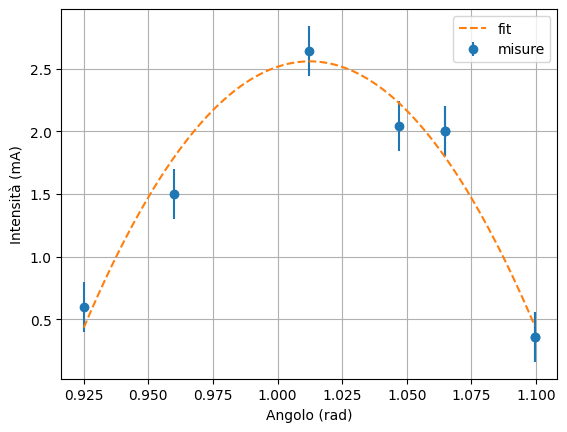

In [1006]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel("Angolo (rad)")
ax.set_ylabel("Intensità (mA)")

ax.errorbar(theta_2_n,M_2_n,err_M_n,fmt='o',label='misure')
x = np.linspace(theta_2_n.min(),theta_2_n.max(),1000)
y = model(x,a2,b2,c2)
ax.plot(x,y,linestyle='--',label='fit')

plt.grid()
plt.legend()
plt.show()

### Calcolo di d

In [1007]:
print(theta_max1)
print(theta_max2)

0.40+/-0.14
1.01+/-0.12


In [1008]:
d1 = (1 * 2.85)/(2 * sin(theta_max1))
d2 = (2 * 2.85)/(2 * sin(theta_max2))
print(d1)
print(d2)

3.7+/-1.3
3.36+/-0.26


In [1009]:
t1 = (3.7 - 3.8) / np.sqrt(1.3**2 + 0.05**2)
t2 = (3.36 - 3.8) / np.sqrt(0.26**2 + 0.05**2)
print(t1)
print(t2)

-0.0768662442024085
-1.6618570641210952
